In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
folder = "../database_cleaned"
#avis_clean = pd.read_csv(f"database_cleaned/avis_clean.csv", header=None, names=["Game id", "User id", "Game name UI", "Username", "Datetime", "Rating", "Comment title", "Comment body"])
avis_clean = pd.read_csv(f"{folder}/avis_clean.csv", index_col=0)
jeux_clean = pd.read_csv(f"{folder}/jeux_clean.csv", index_col=0)

In [5]:
def filter_df(df_reviews : pd.DataFrame, min_reviews, max_iter = 10):
    """
    TODO : add parameters (memorise previous values) to stop the function when the number of users & games has converged
    """

    if (max_iter == 0):
        return df_reviews
    
    # Print remaining number of users and remaining number of games
    print(df_reviews["User id"].nunique(), df_reviews["Game id"].nunique())

    # Goal : eliminate users who gave less than < min_reviews
    # Dataframe produced : index, User id, Number of rated games per user [this column is named as Game id]
    count_users = df_reviews[["Game id", "User id"]].groupby("User id").count().reset_index()

    # Reduce DataFrame 'df_reviews' which will contain only users who gave at least 'min reviews' 
    reduced = df_reviews[df_reviews["User id"].isin(count_users[count_users["Game id"] > min_reviews]["User id"])] # delete users

    # Goal : eliminate games who gave less than < min_reviews (users are already deleted)
    # Dataframe produced : index, Game id, Number of users who rated the game [this columns is named as User id]
    count_games = reduced.groupby("Game id").count().reset_index()
    
    # Reduce DataFrame 'reduced' which will contain only users who gave at least 'min reviews' AND 
    # games who received at least 'min reviews' from these users
    reduced = reduced[reduced["Game id"].isin(count_games[count_games["User id"] > min_reviews]["Game id"])] # delete games

    # Check convergence
    if(df_reviews.equals(reduced) or len(reduced) == 0): return reduced

    # If not : reiterate (recursion) till convergence 
    else : return filter_df(reduced, min_reviews, max_iter - 1)
    

In [6]:
df = filter_df(avis_clean, 10)

11201 10549
2086 2464
1800 2399
1792 2397
1791 2396


11201 10549
2639 3210
2387 3157
2379 3156
11201 10549
2639 3210
2387 3157
2379 3156
11201 10549
2437 2911
2150 2853
2139 2846
11201 10549
2252 2676
1957 2618
1947 2616
1946 2615
1945 2614
11201 10549
2086 2464
1800 2399
1792 2397
1791 2396
11201 10549
1965 2282
1649 2196
1638 2191
1637 2191
11201 10549
1850 2107
1530 2021
1509 2011
1507 2011
11201 10549
1744 1958
1410 1869
1391 1865
1390 1865
11201 10549
2639 3210
2387 3157
2379 3156
11201 10549
2639 3210
2387 3157
2379 3156
11201 10549
2437 2911
2150 2853
2139 2846
11201 10549
2252 2676
1957 2618
1947 2616
1946 2615
1945 2614
11201 10549
2086 2464
1800 2399
1792 2397
1791 2396
11201 10549
1965 2282
1649 2196
1638 2191
1637 2191
11201 10549
1850 2107
1530 2021
1509 2011
1507 2011
11201 10549
1744 1958
1410 1869
1391 1865
1390 1865
Affichage


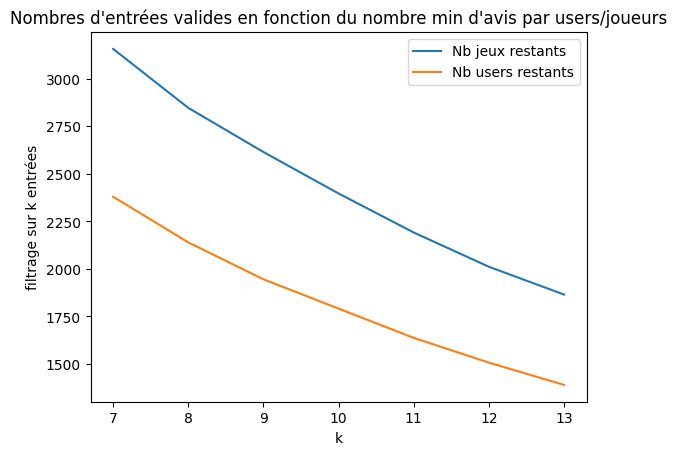

In [ ]:
# Affichage : 
x_data = np.arange(start=7,stop=14,step=1)
vect_jeux = np.vectorize(lambda x : filter_df(avis_clean,x)["Game id"].nunique())
vect_users = np.vectorize(lambda x : filter_df(avis_clean,x)["User id"].nunique())

y_data_jeux = vect_jeux(x_data)
y_data_users = vect_users(x_data)

print("Affichage")
plt.scatter(x_data,y_data_jeux, label ="Nb jeux restants")
plt.scatter(x_data, y_data_users, label ="Nb users restants")
#plt.scatter(x)
plt.xlabel("k")
plt.ylabel("filtrage sur k entrées")
plt.legend()
plt.title("Nombres d'entrées valides en fonction du nombre min d'avis par users/joueurs")
plt.show()


In [ ]:
df[["User id", "Game id"]].groupby("User id").count().reset_index().sort_values(by="Game id")

,User id,Game id
1781,8681,11
1759,7729,11
1761,7925,11
1760,7878,11
1738,7341,11
...,...,...
116,201,602
45,91,637
1,1,724
39,83,753
